In [1]:
from google.colab import files
files.upload()

!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!pip install -q kaggle
!kaggle datasets download -d vipoooool/new-plant-diseases-dataset
!unzip -q new-plant-diseases-dataset.zip -d plant_diseases_dataset
!pip install tensorflow matplotlib pandas seaborn

Saving kaggle.json to kaggle.json
Dataset URL: https://www.kaggle.com/datasets/vipoooool/new-plant-diseases-dataset
License(s): copyright-authors


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Importing Libraries

In [3]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

train_dir = "/content/plant_diseases_dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train"
valid_dir = "/content/plant_diseases_dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid"

### Data Preprocessing

#### Train Image Preprocessing

In [4]:
training_set = tf.keras.utils.image_dataset_from_directory(
    train_dir, #name of directory
    labels="inferred", #select label as the subdirctories present in the main directory
    label_mode="categorical",#for multioutput or multiple classification
    class_names = None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,#to decrease biasness (not only from folder sequence wise)
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    data_format=None,
    verbose=True,
)

Found 70295 files belonging to 38 classes.


### Validation Image Preprocessing

In [5]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    valid_dir, #name of directory
    labels="inferred", #select label as the subdirctories present in the main directory
    label_mode="categorical",#for multioutput or multiple classification
    class_names = None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,#to decrease biasness (not only from folder sequence wise)
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    data_format=None,
    verbose=True,
)

Found 17572 files belonging to 38 classes.


#### To avoid overshooting
1. Choose small learning rate default 0.001 we are taking 0.0001
2. There may be chance of underfitting, so increase number of neuron
3. Add more Convolution layer to extract more feature from images there may be possiblilty that model unable to capture relevant feature or model is confusing due to lack of feature so feed with more feature

## Building model

In [6]:
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten,Dropout
from tensorflow.keras.models import Sequential

In [7]:
model = Sequential()

## Building Convultion layer

model.add(Conv2D(filters=32,kernel_size=3 ,padding='same',activation='relu',input_shape=[128,128,3]))
model.add(Conv2D(filters=32,kernel_size=3 ,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
model.add(Conv2D(filters=64,kernel_size=3 ,padding='same',activation='relu'))
model.add(Conv2D(filters=64,kernel_size=3 ,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [9]:
model.add(Conv2D(filters=128,kernel_size=3 ,padding='same',activation='relu'))
model.add(Conv2D(filters=128,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [10]:
model.add(Conv2D(filters=256,kernel_size=3 ,padding='same',activation='relu'))
model.add(Conv2D(filters=256,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [11]:
model.add(Conv2D(filters=512,kernel_size=3 ,padding='same',activation='relu'))
model.add(Conv2D(filters=512,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [12]:
model.add(Dropout(0.25)) #to avoid overfitting

### Flattening operation

model.add(Flatten())
model.add(Dense(units=1500,activation='relu'))
model.add(Dropout(0.4))

In [13]:
# Output layer
model.add(Dense(units=38,activation='softmax'))

### Compiling model

In [14]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 128, 128, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 126, 126, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 63, 63, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 61, 61, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 30, 30, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 28, 28, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 14, 14, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 12, 12, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 6, 6, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 6, 6, 512)           │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1500)                │       3,073,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 1500)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 38)                  │          57,038 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,842,762 (29.92 MB)

 Trainable params: 7,842,762 (29.92 MB)

 Non-trainable params: 0 (0.00 B)

### Model training

In [15]:
training_history = model.fit(x=training_set,validation_data=validation_set,epochs=10)

Epoch 1/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 161s 67ms/step - accuracy: 0.4106 - loss: 2.0658 - val_accuracy: 0.7900 - val_loss: 0.6791
Epoch 2/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 133s 60ms/step - accuracy: 0.8389 - loss: 0.5056 - val_accuracy: 0.9058 - val_loss: 0.3027
Epoch 3/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 140s 60ms/step - accuracy: 0.9074 - loss: 0.2903 - val_accuracy: 0.9286 - val_loss: 0.2216
Epoch 4/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 140s 64ms/step - accuracy: 0.9355 - loss: 0.2000 - val_accuracy: 0.9230 - val_loss: 0.2412
Epoch 5/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 130s 59ms/step - accuracy: 0.9534 - loss: 0.1443 - val_accuracy: 0.9438 - val_loss: 0.1769
Epoch 6/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 129s 59ms/step - accuracy: 0.9628 - loss: 0.1103 - val_accuracy: 0.9611 - val_loss: 0.1239
Epoch 7/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 143s 59ms/step - accuracy: 0.9705 - loss: 0.0933 - val_accuracy: 0.9576 - val_loss: 0.1436
Epoch 8/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 131s 59ms/step - accuracy: 

## Model Evaluation

In [52]:
#Modern evalutaion on training set
train_loss,train_acc = model.evaluate(training_set)
print("Training accuracy: ",train_acc)

2197/2197 ━━━━━━━━━━━━━━━━━━━━ 45s 20ms/step - accuracy: 0.9764 - loss: 0.0710
Training accuracy:  0.9778220653533936


In [17]:
print(train_loss,train_acc)

0.06775664538145065 0.9778220653533936


In [18]:
#Model on validation set
val_loss,val_acc = model.evaluate(validation_set)

550/550 ━━━━━━━━━━━━━━━━━━━━ 12s 21ms/step - accuracy: 0.9486 - loss: 0.1783


In [19]:
print(train_loss,train_acc)

0.06775664538145065 0.9778220653533936


### Saving model

In [63]:
model.save("/content/drive/MyDrive/Plant Leaf Disease Detection using deep learning/trained_model.keras") #to decrease file size

In [21]:
training_history.history

{'accuracy': [0.6089338064193726,
  0.8623799681663513,
  0.9150295257568359,
  0.940308690071106,
  0.9559712409973145,
  0.9633544087409973,
  0.9720748066902161,
  0.9755601286888123,
  0.9787609577178955,
  0.9816914200782776],
 'loss': [1.3129584789276123,
  0.4293820261955261,
  0.2613198459148407,
  0.18611474335193634,
  0.13635991513729095,
  0.10777892172336578,
  0.08630397915840149,
  0.07562946528196335,
  0.0648522824048996,
  0.05806351825594902],
 'val_accuracy': [0.7900068163871765,
  0.9058160781860352,
  0.928579568862915,
  0.9230024814605713,
  0.9437741637229919,
  0.9610744118690491,
  0.9576029777526855,
  0.9648303985595703,
  0.9538470506668091,
  0.9499203562736511],
 'val_loss': [0.6790784597396851,
  0.30265507102012634,
  0.22158710658550262,
  0.2411544770002365,
  0.17693910002708435,
  0.12386300414800644,
  0.14355772733688354,
  0.12087953835725784,
  0.16282957792282104,
  0.1762145757675171]}

In [67]:
#Recording model history in json
import shutil

source_path = "/content/training_hist.json"  # Adjust if your file is elsewhere
destination_path = "/content/drive/MyDrive/Plant Leaf Disease Detection using deep learning/training_hist.json"  # Saves to your Drive's root
shutil.copy(source_path, destination_path)

import json
with open("training_hist.json","w") as f:
    json.dump(training_history.history,f)

### Accuracy Visualization

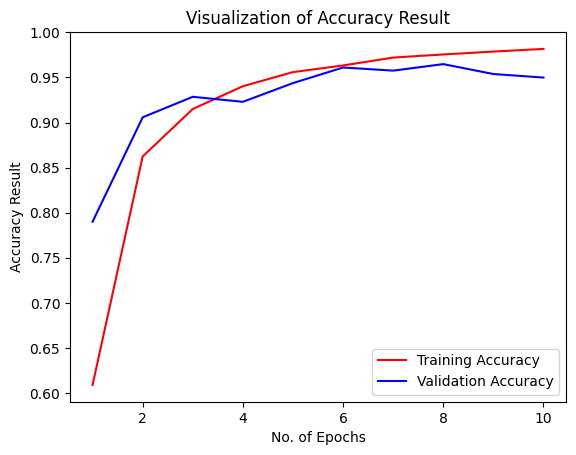

In [23]:
epochs = [i for i in range(1,11)]
plt.plot(epochs,training_history.history['accuracy'],color='red',label='Training Accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],color='blue',label='Validation Accuracy')
plt.xlabel("No. of Epochs")
plt.ylabel("Accuracy Result")
plt.title("Visualization of Accuracy Result")
plt.legend()
plt.show()

#### Some other metrics for model evaluation

In [54]:
class_name = validation_set.class_names
class_name

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_

In [55]:
test_set = tf.keras.utils.image_dataset_from_directory(
    valid_dir, #name of directory
    labels="inferred", #select label as the subdirctories present in the main directory
    label_mode="categorical",#for multioutput or multiple classification
    class_names = None,
    color_mode="rgb",
    batch_size=1,
    image_size=(128, 128),
    shuffle=False,#entire subdirectories will passed sequentially
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    data_format=None,
    verbose=True,
)

Found 17572 files belonging to 38 classes.


In [56]:
y_pred = model.predict(test_set)
y_pred,y_pred.shape

17572/17572 ━━━━━━━━━━━━━━━━━━━━ 52s 3ms/step


(array([[9.99996781e-01, 6.44390568e-08, 1.58579923e-08, ...,
         1.10124461e-13, 8.97939654e-13, 1.96315367e-10],
        [9.99999404e-01, 2.04801287e-09, 8.03210387e-10, ...,
         3.67519125e-14, 3.11790605e-13, 2.36149399e-11],
        [1.00000000e+00, 1.03678434e-10, 4.74733530e-10, ...,
         2.07614848e-15, 8.98862216e-14, 1.76623927e-09],
        ...,
        [8.16841317e-11, 1.16189766e-11, 9.08813291e-08, ...,
         1.06656149e-10, 1.45789464e-10, 9.99993801e-01],
        [2.20125185e-11, 1.54873781e-12, 4.48945370e-09, ...,
         1.63811707e-11, 6.11336676e-12, 9.99999881e-01],
        [8.13345566e-14, 3.33863648e-15, 3.15914639e-13, ...,
         1.36977459e-14, 4.75380846e-12, 9.99999881e-01]], dtype=float32),
 (17572, 38))

In [58]:
predicted_categories = tf.argmax(y_pred,axis=1)
predicted_categories

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37])>

In [59]:
true_categories = tf.concat([y for x,y in test_set],axis=0)
y_true = tf.argmax(true_categories,axis=1)
y_true

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37])>

In [60]:
from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(y_true,predicted_categories)

In [61]:
print(classification_report(y_true,predicted_categories,target_names=class_name))

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.96      0.90      0.93       504
                                 Apple___Black_rot       0.99      0.98      0.99       497
                          Apple___Cedar_apple_rust       0.97      0.96      0.96       440
                                   Apple___healthy       1.00      0.87      0.93       502
                               Blueberry___healthy       0.95      0.99      0.97       454
          Cherry_(including_sour)___Powdery_mildew       0.97      0.99      0.98       421
                 Cherry_(including_sour)___healthy       0.98      0.98      0.98       456
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.85      0.95      0.90       410
                       Corn_(maize)___Common_rust_       1.00      0.99      0.99       477
               Corn_(maize)___Northern_Leaf_Blight       0.98      0.85      0.

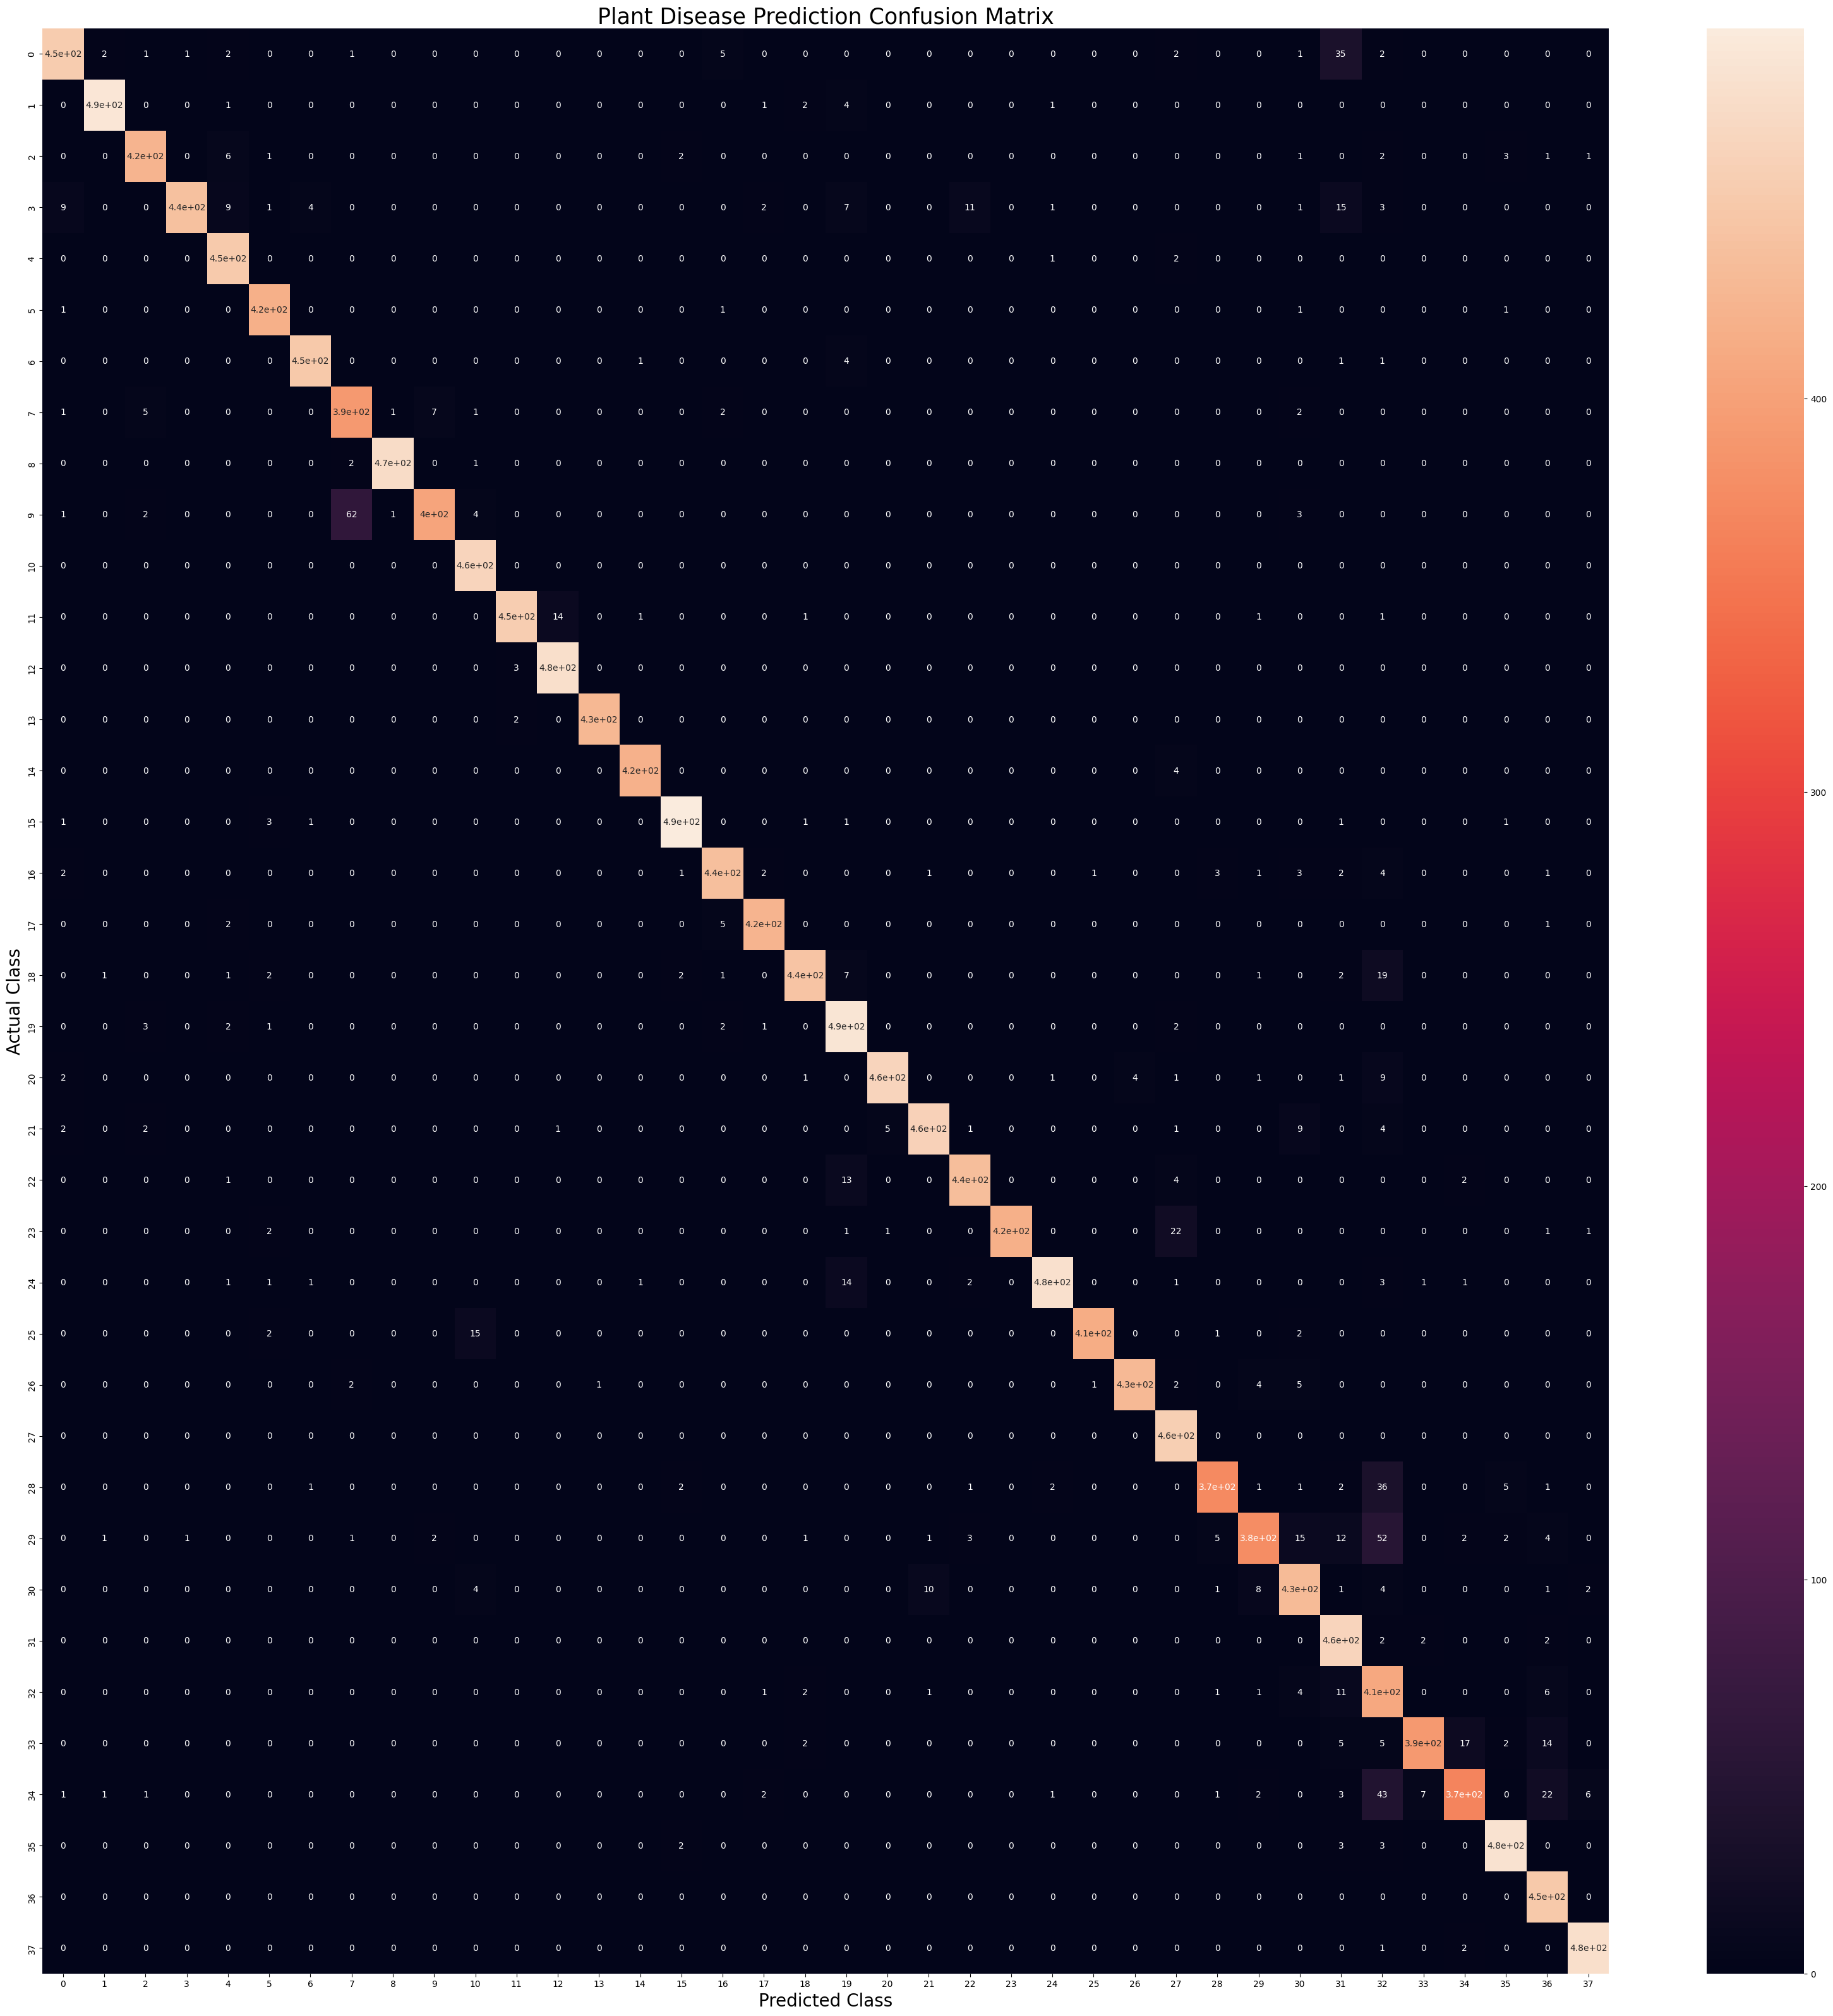

In [62]:
plt.figure(figsize=(40,40))
sns.heatmap(cm,annot=True,annot_kws={"size":10})

plt.xlabel('Predicted Class',fontsize = 20)
plt.ylabel('Actual Class',fontsize = 20)
plt.title('Plant Disease Prediction Confusion Matrix',fontsize = 25)
plt.show()